In [47]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import tensorflow as tf

img_height = 64
img_width = 64
batch_size = 32
SEED = 123

In [49]:
train_dir = "/content/drive/MyDrive/Data_SET_AI - Edit - Copy/Train2"
test_dir  = "/content/drive/MyDrive/Data_SET_AI - Edit - Copy/test 2"

print("Train path:", train_dir)
print("Test path :", test_dir)

Train path: /content/drive/MyDrive/Data_SET_AI - Edit - Copy/Train2
Test path : /content/drive/MyDrive/Data_SET_AI - Edit - Copy/test 2


In [50]:
print("Loading training dataset...")

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Loading training dataset...
Found 3810 files belonging to 10 classes.
Using 3048 files for training.


In [51]:
print("Loading validation dataset...")

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Loading validation dataset...
Found 3810 files belonging to 10 classes.
Using 762 files for validation.


In [52]:
print("Loading test dataset...")

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Loading test dataset...
Found 886 files belonging to 10 classes.


In [53]:
class_names = train_ds.class_names
num_classes = len(class_names)

print("Class Names:", class_names)
print("Number of Classes:", num_classes)

Class Names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Number of Classes: 10


In [54]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

print(" Normalization done")

 Normalization done


In [55]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

print(" Performance optimization done")

 Performance optimization done


In [56]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,237,386 (4.72 MB)

 Trainable params: 1,237,386 (4.72 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model successfully compiled and ready to learn!")

Model successfully compiled and ready to learn!


In [58]:

epochs = 10

print("Starting training...")
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
print("Training complete!")

Starting training...
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.5186 - loss: 1.3788 - val_accuracy: 0.9738 - val_loss: 0.1267
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.9682 - loss: 0.1045 - val_accuracy: 0.9711 - val_loss: 0.1050
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9899 - loss: 0.0370 - val_accuracy: 0.9934 - val_loss: 0.0281
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.9956 - loss: 0.0218 - val_accuracy: 0.9816 - val_loss: 0.0592
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9960 - loss: 0.0159 - val_accuracy: 0.9882 - val_loss: 0.0533
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9975 - loss: 0.0103 - val_accuracy: 0.9921 - val_loss: 0.0400
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.9935 - loss: 0.0235 - val_accuracy: 0.9908 - val_loss: 0.0421
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9947 - lo

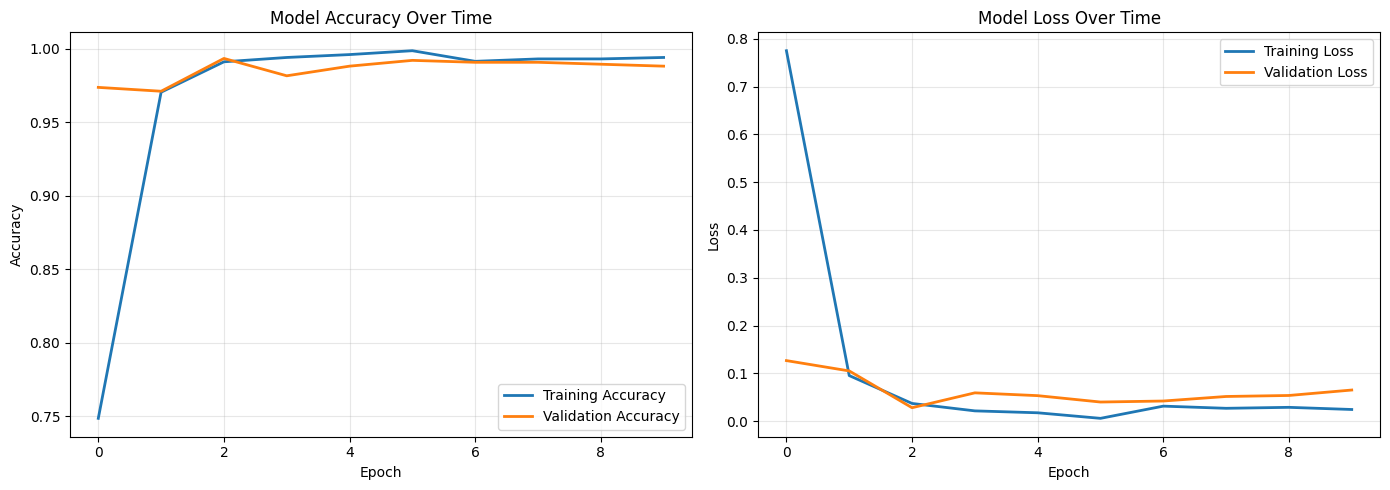

In [59]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 5))

# 1. Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Plot Loss (Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:

print("\nEvaluating model on Test Data...")
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")


Evaluating model on Test Data...
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8570 - loss: 0.6556

Final Test Accuracy: 83.63%
Final Test Loss: 0.8957


In [61]:
print("Loading unshuffled test dataset...")

test_ds_unshuffled = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

class_names = test_ds_unshuffled.class_names
print("Class Names:", class_names)

Loading unshuffled test dataset...
Found 886 files belonging to 10 classes.
Class Names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [62]:
test_ds_unshuffled = test_ds_unshuffled.map(
    lambda x, y: (normalization_layer(x), y)
)

print("Test dataset normalized.")

Test dataset normalized.


In [63]:
import numpy as np

print("Generating predictions...")

y_pred_probs = model.predict(test_ds_unshuffled)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.concatenate(
    [y.numpy() for x, y in test_ds_unshuffled],
    axis=0
)

print("Predictions generated.")

Generating predictions...
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step
Predictions generated.


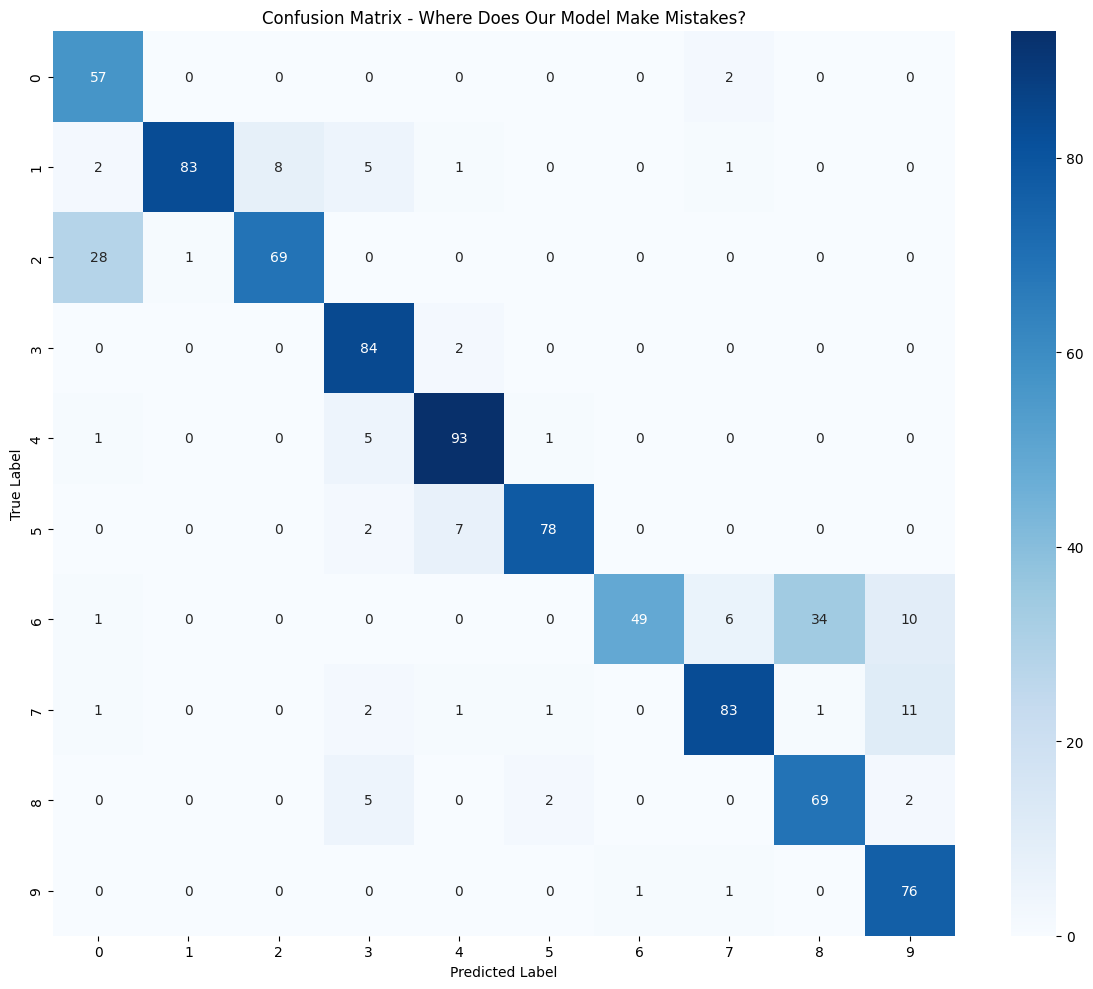


Most Common Misclassifications:
0 misclassified as 7: 2 times
1 misclassified as 0: 2 times
1 misclassified as 2: 8 times
1 misclassified as 3: 5 times
1 misclassified as 4: 1 times
1 misclassified as 7: 1 times
2 misclassified as 0: 28 times
2 misclassified as 1: 1 times
3 misclassified as 4: 2 times
4 misclassified as 0: 1 times
4 misclassified as 3: 5 times
4 misclassified as 5: 1 times
5 misclassified as 3: 2 times
5 misclassified as 4: 7 times
6 misclassified as 0: 1 times
6 misclassified as 7: 6 times
6 misclassified as 8: 34 times
6 misclassified as 9: 10 times
7 misclassified as 0: 1 times
7 misclassified as 3: 2 times
7 misclassified as 4: 1 times
7 misclassified as 5: 1 times
7 misclassified as 8: 1 times
7 misclassified as 9: 11 times
8 misclassified as 3: 5 times
8 misclassified as 5: 2 times
8 misclassified as 9: 2 times
9 misclassified as 6: 1 times
9 misclassified as 7: 1 times


In [64]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true.flatten(), y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Where Does Our Model Make Mistakes?")
plt.tight_layout()
plt.show()


print("\nMost Common Misclassifications:")
print("=" * 50)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            print(f"{class_names[i]} misclassified as {class_names[j]}: {cm[i, j]} times")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


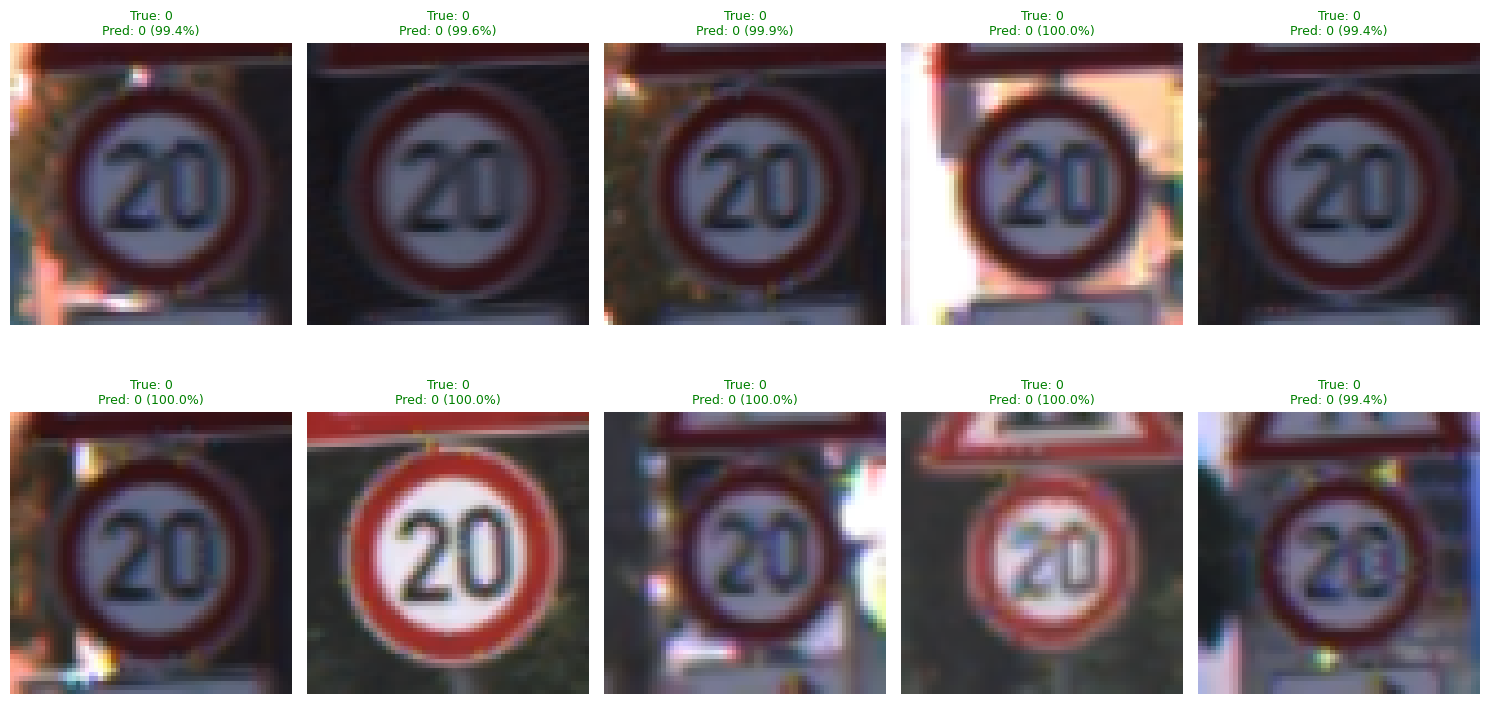

In [65]:
plt.figure(figsize=(15, 8))

for images, labels in test_ds.take(1):
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)

    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy())

        true_label = class_names[int(labels[i])]
        pred_label = class_names[int(batch_pred_labels[i])]
        confidence = np.max(batch_predictions[i]) * 100

        color = 'green' if true_label == pred_label else 'red'
        plt.title(
            f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)",
            fontsize=9,
            color=color
        )
        plt.axis('off')

plt.tight_layout()
plt.show()

In [66]:
print("Saving model...")

model.save('traffic_sign_model.h5')
model.save('/content/drive/MyDrive/traffic_sign_model.h5')

print(" Model saved.")

Saving model...
 Model saved.
